## Data Exploration for Rb -- Major Contracts

### Summary of All files for Rb

In [1]:
import os
import fnmatch
import pandas as pd

filepattern = "rb*"
filepath = "/home/rz14/Documents/QR_Qishi/tick2016/rb"
dt_filename = []
for path, dirlist, filelist in os.walk(filepath):
    for filename in fnmatch.filter(filelist,filepattern):
        prod = path.split('/')[-2]
        day_night = path.split('/')[-1]
        contract = filename.split('_')[0]
        date = filename.split('_')[1].split('.')[0]
        dt_filename.append([prod,day_night, contract, date, filename,path])
dt_filename = pd.DataFrame(dt_filename,
                           columns=["product","section","contract","date","filename","path"])
dt_filename.head()


,product,section,contract,date,filename,path
0,rb,day,rb1609,20160223,rb1609_20160223.csv,/home/rz14/Documents/QR_Qishi/tick2016/rb/day
1,rb,day,rb1606,20160113,rb1606_20160113.csv,/home/rz14/Documents/QR_Qishi/tick2016/rb/day
2,rb,day,rb1706,20160711,rb1706_20160711.csv,/home/rz14/Documents/QR_Qishi/tick2016/rb/day
3,rb,day,rb1611,20161012,rb1611_20161012.csv,/home/rz14/Documents/QR_Qishi/tick2016/rb/day
4,rb,day,rb1602,20160201,rb1602_20160201.csv,/home/rz14/Documents/QR_Qishi/tick2016/rb/day


In [2]:
dt_file_smry = dt_filename[['section','contract','date']].groupby(['section','contract']).agg(['count','min','max']).reset_index()

dt_file_day = dt_file_smry.loc[dt_file_smry['section'] == 'day'].copy()
dt_file_day.columns = ['section','contract','count_day','FirstDate_day','LastDate_day']
dt_file_day = dt_file_day.drop("section",axis=1)


dt_file_night = dt_file_smry.loc[dt_file_smry['section'] == 'night'].copy()
dt_file_night.columns = ['section','contract','count_night','FirstDate_night','LastDate_night']
dt_file_night = dt_file_night.drop("section",axis=1)

dt_file_smry = pd.merge(dt_file_day,dt_file_night, on="contract")
dt_file_smry

,contract,count_day,FirstDate_day,LastDate_day,count_night,FirstDate_night,LastDate_night
0,rb1601,10,20160104,20160115,9,20160104,20160114
1,rb1602,26,20160104,20160215,25,20160104,20160215
2,rb1603,47,20160104,20160315,45,20160104,20160314
3,rb1604,69,20160104,20160415,66,20160104,20160414
4,rb1605,89,20160104,20160516,85,20160104,20160513
5,rb1606,109,20160104,20160615,104,20160104,20160614
6,rb1607,131,20160104,20160715,126,20160104,20160714
7,rb1608,152,20160104,20160815,147,20160104,20160812
8,rb1609,175,20160104,20160919,170,20160104,20160919
9,rb1610,190,20160104,20161017,183,20160104,20161014


### Get the daily trading volume

In [3]:
# read in the first and last row for each file to calculate the trading volume
# This is not very efficient and will take a while
import csv
dt_filename['volume'] = 0
for i in range(len(dt_filename)):
    if i % 1000 == 0:
        print("reading file #",i)
    filename = dt_filename.iloc[i]["path"]+'/'+dt_filename.iloc[i]["filename"]
    df_temp = pd.read_csv(filename) 
    temp_vol = df_temp.iloc[0]['Volume'] + df_temp.iloc[-1]["AccVolume"]-df_temp.iloc[0]["AccVolume"]
    dt_filename.set_value(i,'volume',temp_vol )
dt_filename.head()

reading file # 0


/home/rz14/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()


reading file # 1000
reading file # 2000
reading file # 3000
reading file # 4000
reading file # 5000


,product,section,contract,date,filename,path,volume
0,rb,day,rb1609,20160223,rb1609_20160223.csv,/home/rz14/Documents/QR_Qishi/tick2016/rb/day,2550
1,rb,day,rb1606,20160113,rb1606_20160113.csv,/home/rz14/Documents/QR_Qishi/tick2016/rb/day,284
2,rb,day,rb1706,20160711,rb1706_20160711.csv,/home/rz14/Documents/QR_Qishi/tick2016/rb/day,170
3,rb,day,rb1611,20161012,rb1611_20161012.csv,/home/rz14/Documents/QR_Qishi/tick2016/rb/day,1018
4,rb,day,rb1602,20160201,rb1602_20160201.csv,/home/rz14/Documents/QR_Qishi/tick2016/rb/day,564


### Get the top 2 major trading contracts

In [4]:
dt_maj = dt_filename.sort_values(by=['date','section','volume'],ascending=False).groupby(['date','section']).head(2)
dt_maj = dt_maj.sort_values(['date','section'])
# dt_maj['date'] = pd.to_datetime(dt_maj['date'], format='%Y%m%d')
dt_maj.head()
# dt_maj.to_csv('majority_contract.csv',sep='\t')

,product,section,contract,date,filename,path,volume
777,rb,day,rb1605,20160104,rb1605_20160104.csv,/home/rz14/Documents/QR_Qishi/tick2016/rb/day,6700936
824,rb,day,rb1610,20160104,rb1610_20160104.csv,/home/rz14/Documents/QR_Qishi/tick2016/rb/day,197286
3686,rb,night,rb1605,20160104,rb1605_20160104.csv,/home/rz14/Documents/QR_Qishi/tick2016/rb/night,4678244
3733,rb,night,rb1610,20160104,rb1610_20160104.csv,/home/rz14/Documents/QR_Qishi/tick2016/rb/night,67022
1572,rb,day,rb1605,20160105,rb1605_20160105.csv,/home/rz14/Documents/QR_Qishi/tick2016/rb/day,4507602


In [5]:
dt_maj_smry = dt_maj[['date','section','volume']].groupby(['date','section']).agg({'sum','max'})
dt_maj_smry.columns = dt_maj_smry.columns.droplevel()
dt_maj_smry.reset_index(inplace=True)
day_volume_min = dt_maj_smry[dt_maj_smry.section == 'day']['max'].min()
night_volume_min = dt_maj_smry[dt_maj_smry.section == 'night']['max'].min()
dt_maj_smry.rename(columns={'volume_sum':'volume_top2','volume_max':'volume_top1'},inplace=True)
dt_maj_smry.head()


,date,section,sum,max
0,20160104,day,6898222,6700936
1,20160104,night,4745266,4678244
2,20160105,day,4632392,4507602
3,20160105,night,1649944,1607658
4,20160106,day,3145094,2996004


## Plot the top two major trading contracts

#### using the minimum daily trading volume of the most traded contracts as a reference line

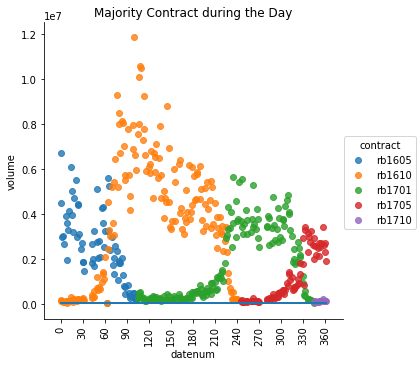

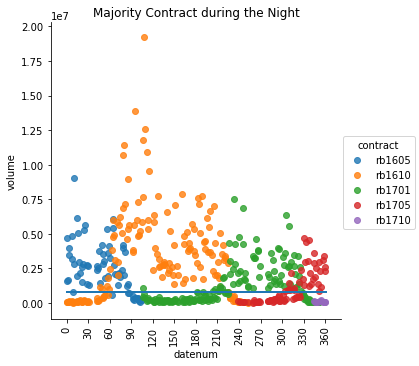

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import dates

from matplotlib.ticker import MultipleLocator, FormatStrFormatter

majorLocator = MultipleLocator(30)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(5)

dt_maj['datenum'] = dates.datestr2num(dt_maj['date'])
dt_maj['datenum'] = dt_maj['datenum'] - dt_maj['datenum'].min()

## Plot Day
sns.lmplot('datenum', 'volume', data=dt_maj[dt_maj['section']=='day'], hue='contract', fit_reg=False)
ax = plt.gca()
plt.plot([dt_maj['datenum'].min(),dt_maj['datenum'].max()],[day_volume_min,day_volume_min],linewidth=2)
#plt.plot([dt_maj['date'][0],194512 ], [dt_maj['date'][-1], 194512], linewidth=2)
ax.set_title("Majority Contract during the Day")
ax.xaxis.set_major_locator(majorLocator)
plt.xticks(rotation='vertical')
plt.show()

## Plot night
sns.lmplot('datenum', 'volume', data=dt_maj[dt_maj['section']=='night'], hue='contract', fit_reg=False)
plt.plot([dt_maj['datenum'].min(),dt_maj['datenum'].max()],[night_volume_min,night_volume_min],linewidth=2)
ax = plt.gca()
ax.set_title("Majority Contract during the Night")
ax.xaxis.set_major_locator(majorLocator)
plt.xticks(rotation='vertical')
plt.show()

### Trading volume of the majority contract (top1)

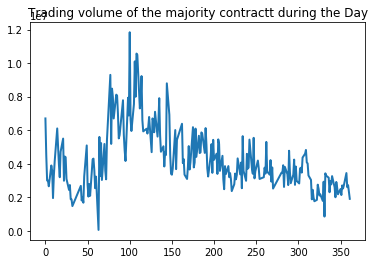

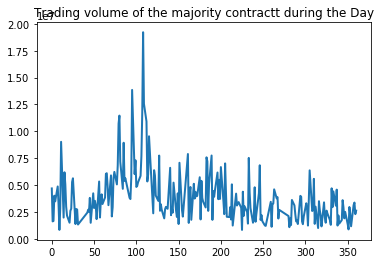

In [7]:

dt_maj_smry['datenum'] = dates.datestr2num(dt_maj_smry['date'])
dt_maj_smry['datenum'] = dt_maj_smry['datenum'] - dt_maj_smry['datenum'].min()

## day
plt.plot(dt_maj_smry[dt_maj_smry['section']=='day']['datenum'],dt_maj_smry[dt_maj_smry['section']=='day']['max'],linewidth=2)
ax = plt.gca()
ax.set_title("Trading volume of the majority contractt during the Day")
plt.show()

## night
plt.plot(dt_maj_smry[dt_maj_smry['section']=='night']['datenum'],dt_maj_smry[dt_maj_smry['section']=='night']['max'],linewidth=2)
ax = plt.gca()
ax.set_title("Trading volume of the majority contractt during the Day")
plt.show()


### Trading volume of the majority contract (sum of top2)

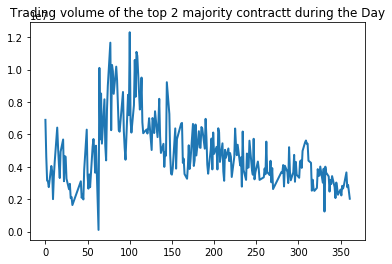

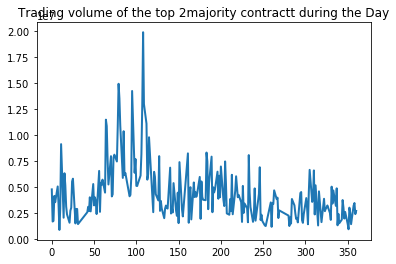

In [8]:
## day
plt.plot(dt_maj_smry[dt_maj_smry['section']=='day']['datenum'],dt_maj_smry[dt_maj_smry['section']=='day']['sum'],linewidth=2)
ax = plt.gca()
ax.set_title("Trading volume of the top 2 majority contractt during the Day")
plt.show()

## night
plt.plot(dt_maj_smry[dt_maj_smry['section']=='night']['datenum'],dt_maj_smry[dt_maj_smry['section']=='night']['sum'],linewidth=2)
ax = plt.gca()
ax.set_title("Trading volume of the top 2majority contractt during the Day")
plt.show()
